# Alien Data Analysis

## Hypothesis

1. Since this is an American dataset, I assume most of the UFO sightings will be reported in the US. 
2. More sightings will be reported in areas with higher population.
3. More sightings should occur at nighttime.
4. There should be more sightings in the more recent years.

In [18]:
# Load data
import pandas as pd
import matplotlib.pyplot as plt

ufo_data = pd.read_csv("ufo_data.csv", error_bad_lines=False)

/home/bill/Documents/Vaccine-sentiment-dashboard/env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3457: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 878: expected 11 fields, saw 12\nSkipping line 1713: expected 11 fields, saw 12\nSkipping line 1815: expected 11 fields, saw 12\nSkipping line 2858: expected 11 fields, saw 12\nSkipping line 3734: expected 11 fields, saw 12\nSkipping line 4756: expected 11 fields, saw 12\nSkipping line 5389: expected 11 fields, saw 12\nSkipping line 5423: expected 11 fields, saw 12\nSkipping line 5614: expected 11 fields, saw 12\nSkipping line 5849: expected 11 fields, saw 12\nSkipping line 6093: expected 11 fields, saw 12\nSkipping line 7516: expected 11 fields, saw 12\nSkipping line 7626: expected 11 fields, saw 12\nSkipping line 8893: expected 11 fields, saw 12\nSkipping line 9015: expected 11 fields, saw 12\n

In [19]:
# Data cleaning
for col in ufo_data.columns:
    ufo_data[[col]] = ufo_data[[col]].replace('\W', '')
ufo_data

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700.0,45 minutes,This event took place in early fall around 194...,4/27/2004,29.883056,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200.0,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.384210,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20.0,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.200000,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20.0,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.978333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.418056,-157.803611
...,...,...,...,...,...,...,...,...,...,...,...
88674,9/9/2013 22:00,napa,ca,us,other,1200.0,hour,Napa UFO&#44,9/30/2013,38.297222,-122.284444
88675,9/9/2013 22:20,vienna,va,us,circle,5.0,5 seconds,Saw a five gold lit cicular craft moving fastl...,9/30/2013,38.901111,-77.265556
88676,9/9/2013 23:00,edmond,ok,us,cigar,1020.0,17 minutes,2 witnesses 2 miles apart&#44 Red &amp; White...,9/30/2013,35.652778,-97.477778
88677,9/9/2013 23:00,starr,sc,us,diamond,0.0,2 nights,On September ninth my wife and i noticed stran...,9/30/2013,34.376944,-82.695833


<AxesSubplot:>

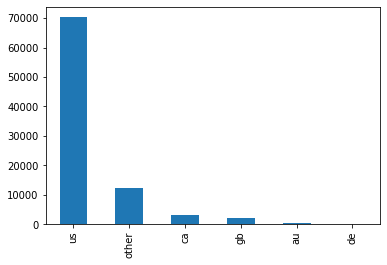

In [20]:
# Country
ufo_data[["country"]] = ufo_data[["country"]].fillna(value="other")
ufo_data["country"].value_counts().plot(kind='bar')

<AxesSubplot:>

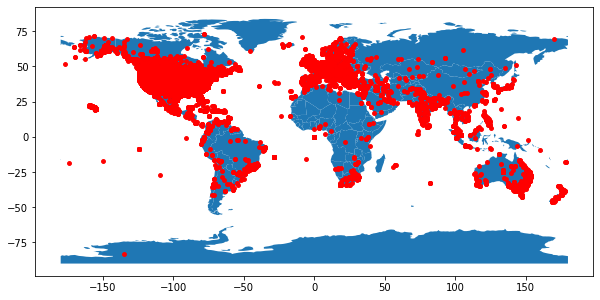

In [21]:
# Geolocation
from shapely.geometry import Point
import geopandas as gpd

geometry = [Point(xy) for xy in zip(ufo_data['longitude'].astype('float'), ufo_data['latitude'].astype('float'))]
gdf = gpd.GeoDataFrame(ufo_data, geometry=geometry)   

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15)

<AxesSubplot:>

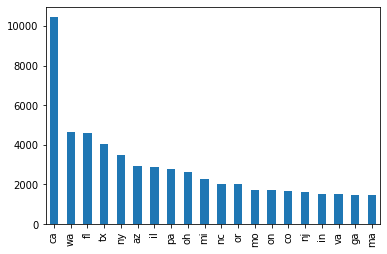

In [22]:
# State
ufo_data["state"].value_counts()[:20].plot(kind='bar')

<AxesSubplot:>

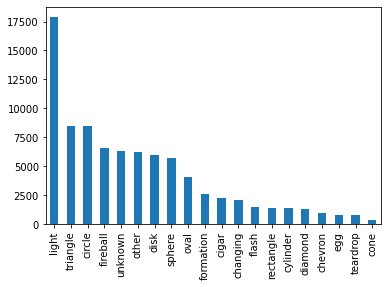

In [23]:
# Shape
ufo_data["shape"].value_counts()[:20].plot(kind='bar')

<AxesSubplot:xlabel='datetime'>

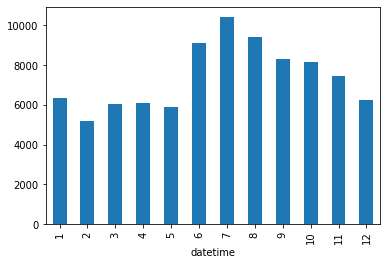

In [24]:
# Convert datetime object
ufo_data[['date', 'time']] = ufo_data['datetime'].str.split(expand=True)
ufo_data['datetime'] = (pd.to_datetime(ufo_data.pop('date'), format='%m/%d/%Y') + pd.to_timedelta(ufo_data.pop('time') + ':00'))
ufo_data['date posted'] = (pd.to_datetime(ufo_data.pop('date posted'), format='%m/%d/%Y'))


# Month
ufo_data['datetime'].groupby(ufo_data['datetime'].dt.month).count().plot(kind="bar")

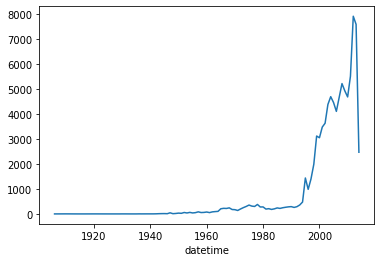

In [25]:
# Year sighted
ufo_data['datetime'].groupby(ufo_data['datetime'].dt.year).count().plot(kind="line")

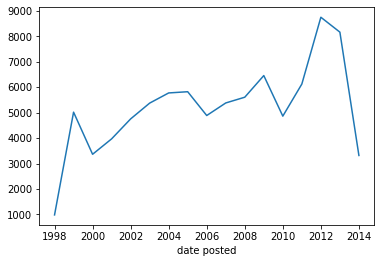

In [26]:
# Year posted
ufo_data["date posted"].groupby(ufo_data['date posted'].dt.year).count().plot(kind="line")

Text(0, 0.5, 'count')

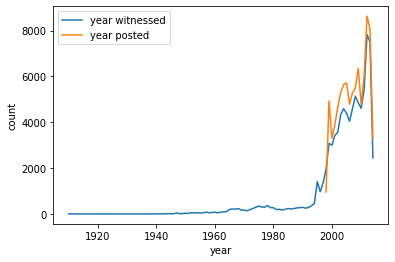

In [31]:
# Combined year graphs
plt.figure()
ufo_data['datetime'].groupby(ufo_data['datetime'].dt.year).count().plot(kind="line")
ufo_data["date posted"].groupby(ufo_data['date posted'].dt.year).count().plot(kind="line")
plt.legend(["year witnessed", "year posted"])
plt.xlabel("year")
plt.ylabel("count")

<AxesSubplot:xlabel='datetime'>

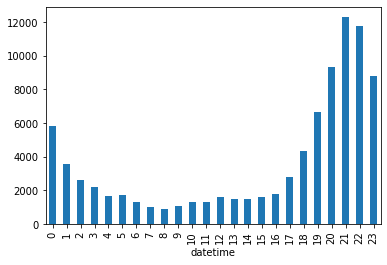

In [27]:
# Hour of the day
ufo_data['datetime'].groupby(ufo_data['datetime'].dt.hour).count().plot(kind="bar")

array([[<AxesSubplot:title={'center':'duration (seconds)'}>]],
      dtype=object)

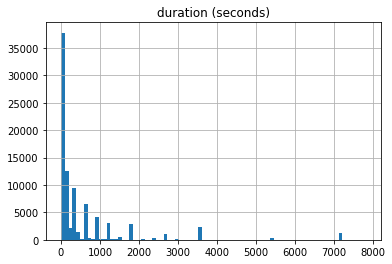

In [28]:
# Duration
ufo_data[['duration (seconds)']] = ufo_data[['duration (seconds)']].astype(float)
ufo_data = ufo_data[ufo_data['duration (seconds)'] < 8000]
ufo_data[['duration (seconds)']].hist(bins=80)